In [1]:
import pickle
import pandas as pd
import datetime
import re
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Pollen count

- Grass.csv: souce on VM

In [2]:
def read_csv(path, file):
    '''
        This function is used to read the csv file
    '''
    data = pd.read_csv(path + file)
    return data

In [3]:
# can define by ourselves
path = "../data/" 
grass = read_csv(path, "Grass.csv")

In [4]:
def extract_columns(data, rename_col, rename_to, columns):
    '''
        This function is mainly applied on the original pollen dataset, aiming to extract the useful columns
        and try to redefine the column 'Count' more specific
    '''
    data_clean = data[columns]
    data_clean = data_clean.rename(columns = {rename_col: rename_to})
    data_clean['Count Date'] = data_clean['Count Date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
    data_clean['year'] = data_clean['Count Date'].dt.to_period("Y").astype(str)
    #data_clean['date'] = data_clean['Count Date'].dt.month.astype(str) + '-' + data_clean['Count Date'].dt.day.astype(str)
    data_clean = data_clean.dropna()

    return data_clean

In [5]:
useful_col = {'Location', 'Count Date', 'Total', 'Name', 'Count'}
rename_col = 'Count'

In [6]:
grass_clean = extract_columns(grass, rename_col, "grass_count", useful_col)
grass_clean_mel = grass_clean[grass_clean['Location']==1]

In [7]:
grass_clean_mel.head(5)

Location  grass_count  Total Count Date       Name  year
0         1          0.0   76.0 2017-09-26  Melbourne  2017
1         1          0.0  335.0 2017-09-27  Melbourne  2017
2         1          3.0  857.0 2017-09-28  Melbourne  2017
3         1          0.0  235.0 2017-09-29  Melbourne  2017
4         1          0.0  263.0 2017-09-30  Melbourne  2017

In [8]:
# save to csv
grass_clean_mel.to_csv('grass_clean_mel.csv')

In [9]:
site_df = grass_clean[['Location', 'Name']].drop_duplicates().reset_index(drop=True)

In [10]:
max(grass_clean_mel[grass_clean_mel['year']=='2020']['grass_count'].fillna(0))

273.0

2017


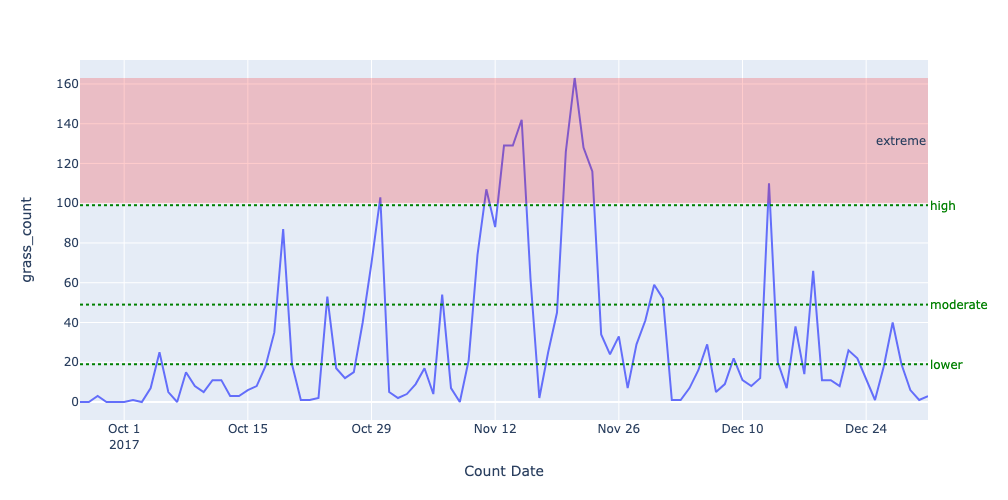

2018


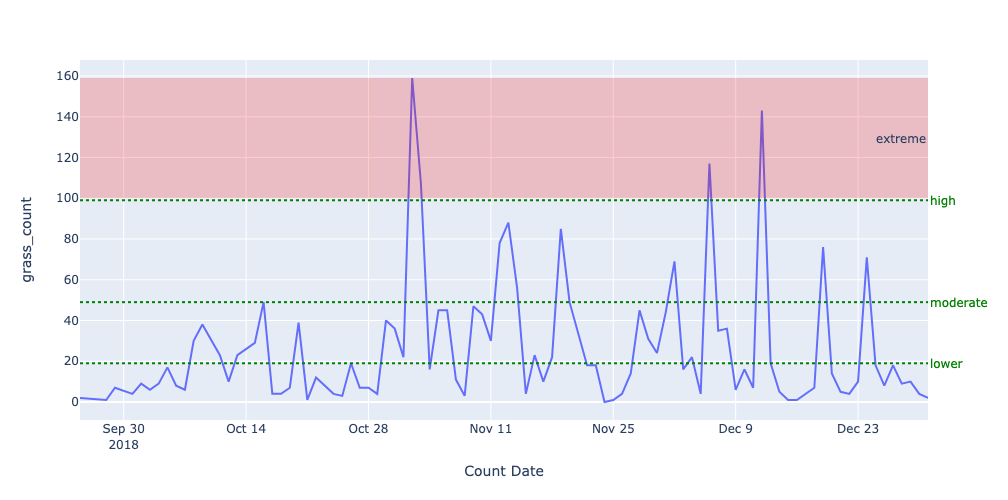

2019


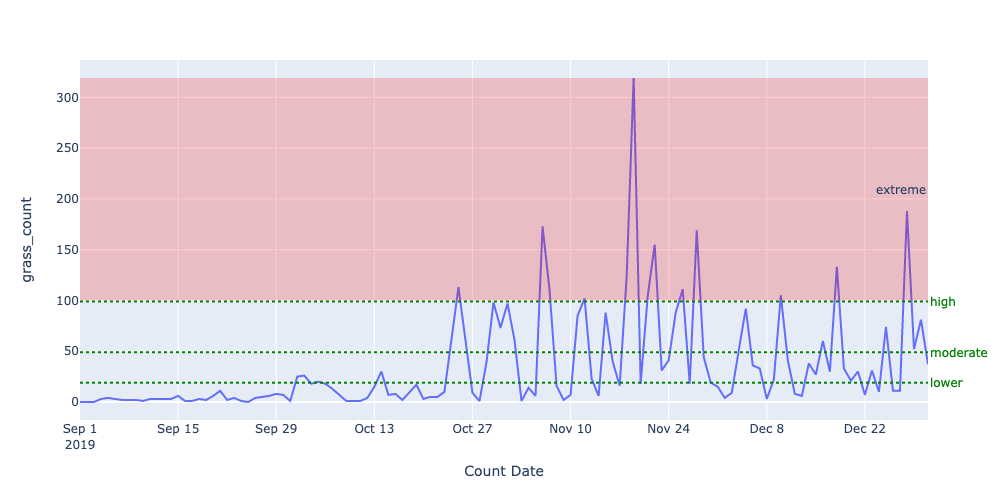

2020


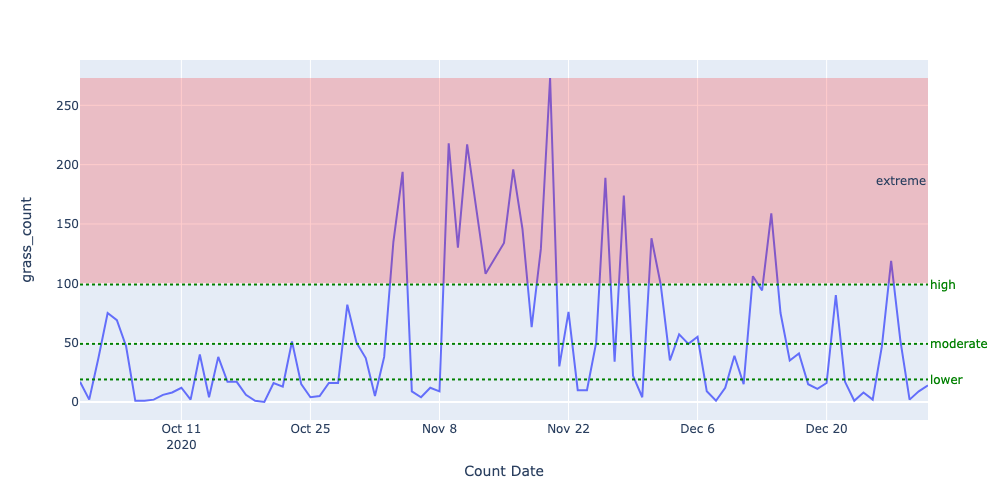

2021


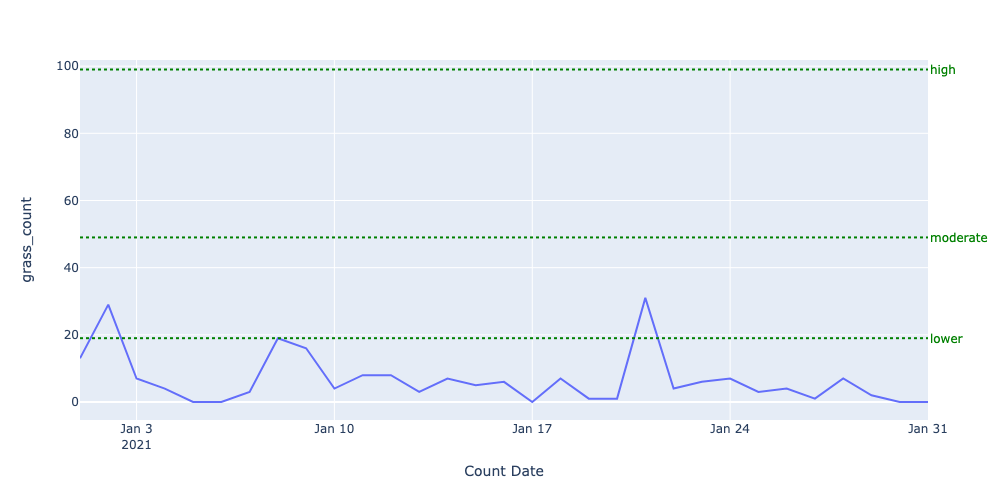

In [11]:
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
year = list(grass_clean_mel['year'].unique())
for yr in year:
    print(yr)
    fig = make_subplots(rows=2, cols=2,
                    start_cell="bottom-left")  
    plot_df = grass_clean_mel[grass_clean_mel['year'] == yr]
    fig = px.line(plot_df, x='Count Date', y='grass_count')
    fig.add_hline(y=19, line_dash="dot", line_color="green",
              annotation_text="lower", 
              annotation_position="right",
              annotation_font_size=12,
              annotation_font_color="green")
    fig.add_hline(y=49, line_dash="dot", line_color="green",
              annotation_text="moderate", 
              annotation_position="right",
              annotation_font_size=12,
              annotation_font_color="green")
    fig.add_hline(y=99, line_dash="dot", line_color="green",
              annotation_text="high", 
              annotation_position="right",
              annotation_font_size=12,
              annotation_font_color="green")
    
    if max(plot_df['grass_count']) >= 100:
        fig.add_hrect(y0=100, y1=max(plot_df['grass_count']), line_width=0, fillcolor="red", opacity=0.2, annotation_text="extreme", annotation_position="right",)

    fig.update_layout(height=500, width= 800)
    fig.show()

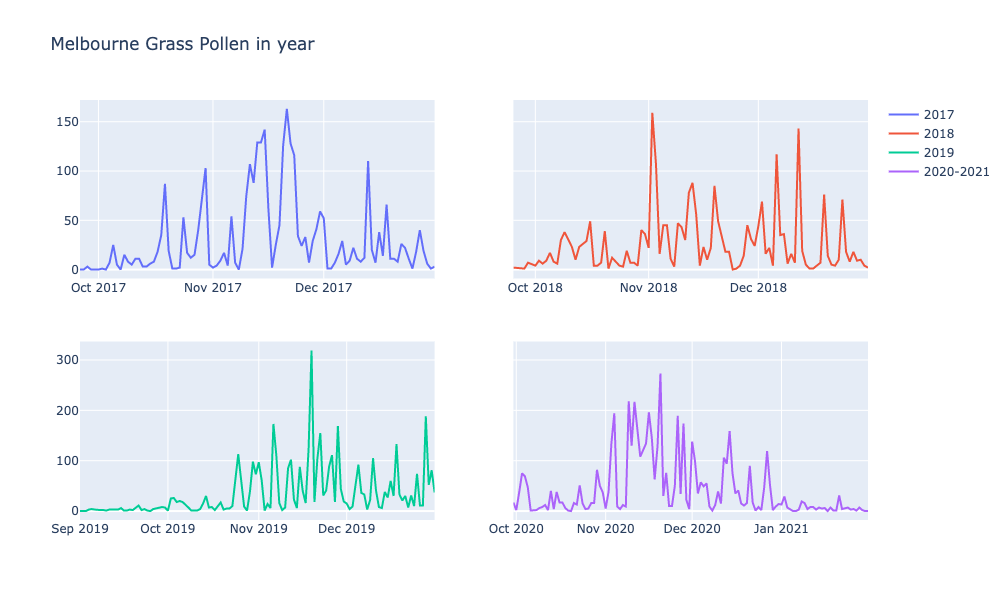

In [12]:
fig = make_subplots(rows=2, cols=2,start_cell="top-left", shared_yaxes=True)  

yr2017 = grass_clean_mel[grass_clean_mel['year'] == '2017']
fig.add_trace(
    go.Scatter(x=yr2017['Count Date'], y=yr2017['grass_count'], name = '2017'),
    row=1, col=1 
)
yr2018 = grass_clean_mel[grass_clean_mel['year'] == '2018' ]
fig.add_trace(
    go.Scatter(x=yr2018['Count Date'], y=yr2018['grass_count'], name = '2018'),
    row=1, col=2  
)

yr2019 = grass_clean_mel[grass_clean_mel['year'] == '2019']
fig.add_trace(
    go.Scatter(x=yr2019['Count Date'], y=yr2019['grass_count'], name = '2019'),
    row=2, col=1  
)

cond = (grass_clean_mel['year']=='2020') | (grass_clean_mel['year']=='2021')
yrlast = grass_clean_mel.loc[cond]
fig.add_trace(
    go.Scatter(x=yrlast['Count Date'], y=yrlast['grass_count'], name = '2020-2021'),
    row=2, col=2 
)




fig.update_layout(height=600, 
                  width=800, 
                  title_text="Melbourne Grass Pollen in year")
fig.show()

In [13]:
cond = (grass_clean_mel['year']=='2020') | (grass_clean_mel['year']=='2021')
df = grass_clean_mel.loc[cond]

df

Location  grass_count  Total Count Date       Name  year
308         1         17.0  692.0 2020-09-30  Melbourne  2020
309         1          2.0   64.0 2020-10-01  Melbourne  2020
310         1         37.0  135.0 2020-10-02  Melbourne  2020
311         1         75.0  501.0 2020-10-03  Melbourne  2020
312         1         69.0  451.0 2020-10-04  Melbourne  2020
..        ...          ...    ...        ...        ...   ...
425         1          1.0   15.0 2021-01-27  Melbourne  2021
426         1          7.0   40.0 2021-01-28  Melbourne  2021
427         1          2.0   60.0 2021-01-29  Melbourne  2021
428         1          0.0    3.0 2021-01-30  Melbourne  2021
429         1          0.0   12.0 2021-01-31  Melbourne  2021

[122 rows x 6 columns]

In [14]:
def plot_full(df):
    
    fig = px.scatter(df, x='Count Date', y='grass_count')
    fig.add_hline(y=19, line_dash="dot", line_color="green",
              annotation_text="low", 
              annotation_position="right",
              annotation_font_size=12,
              annotation_font_color="green")
    fig.add_hline(y=49, line_dash="dot", line_color="green",
              annotation_text="moderate", 
              annotation_position="right",
              annotation_font_size=12,
              annotation_font_color="green")
    fig.add_hline(y=99, line_dash="dot", line_color="green",
              annotation_text="high", 
              annotation_position="right",
              annotation_font_size=12,
              annotation_font_color="green")
   
    fig.add_hrect(y0=100, y1=max(df['grass_count']), line_width=0, fillcolor="red", opacity=0.2, annotation_text="extreme", annotation_position="right",)
    
    fig.update_layout(height=600, width= 1000, title = "Melbourne Grass Pollen Class Distribution")
    fig.show()

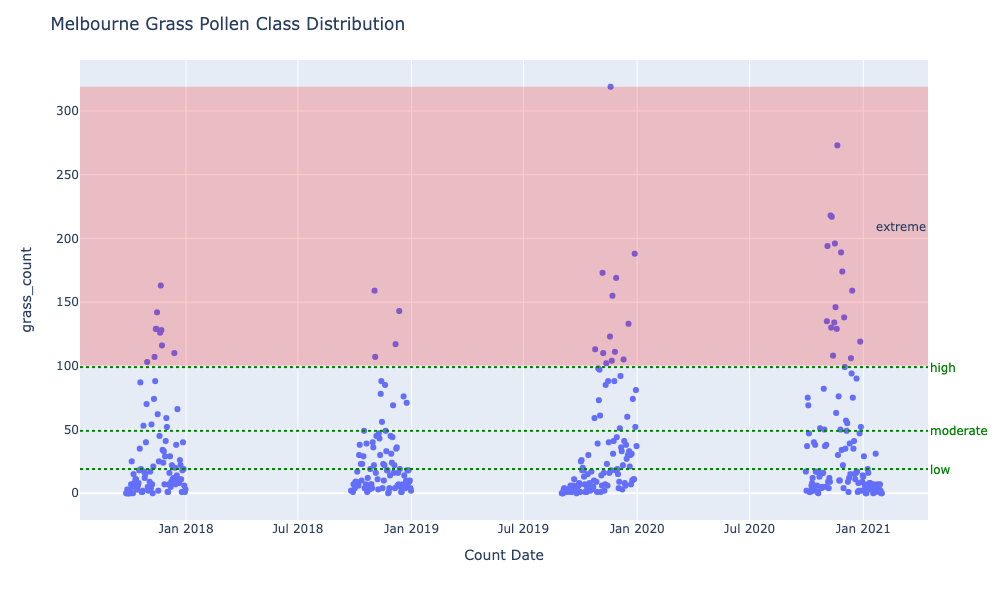

In [15]:
plot_full(grass_clean_mel)

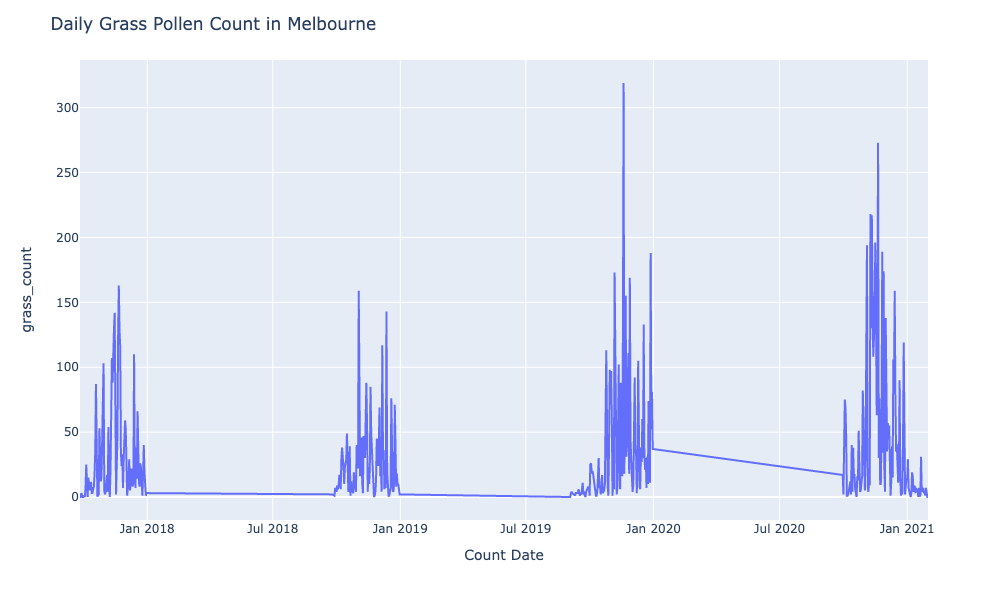

In [16]:
fig = px.line(grass_clean_mel, x='Count Date', y='grass_count')
fig.update_layout(height=600, width= 1000, title = "Daily Grass Pollen Count in Melbourne")
fig.show()